In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np

iris = load_iris()
X = iris.data[:,2:]
y = iris.target
print(X)
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

DecisionTreeClassifier(max_depth=2)

In [4]:
from sklearn.tree import  export_graphviz
#使用graphviz展示决策树
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded=True,
    filled=True
)
# 可以将.dot文件转化为png
# dot -Tpng iris_tree.dot -o iris_tree.png

'''
使用ipython显示数据
from IPython.display import Image
Image(filename = 'xxx',width=xx,heigth=xx)
'''

"\n使用ipython显示数据\nfrom IPython.display import Image\nImage(filename = 'xxx',width=xx,heigth=xx)\n"

In [5]:
tree_clf.predict_proba([[5,1]])

array([[0.        , 0.90740741, 0.09259259]])

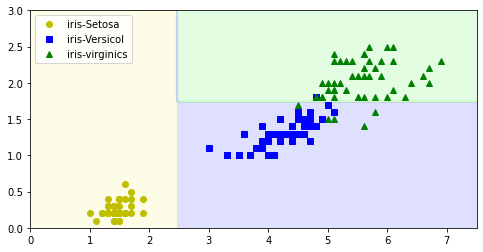

In [18]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,axes=[0,7.5,0,3],iris=True):
    x1s = np.linspace(axes[0],axes[1],100)
    x2s = np.linspace(axes[2],axes[3],100)
    X1 ,X2  = np.meshgrid(x1s,x2s)
    X_new = np.c_[X1.ravel(),X2.ravel()]
    y_pre = clf.predict(X_new).reshape(X1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(X1,X2,y_pre,alpha=0.3,cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contourf(X1,X2,y_pre,cmap=custom_cmap2,alpha=0.8)
    plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label="iris-Setosa")
    plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',label="iris-Versicol")
    plt.plot(X[:,0][y==2],X[:,1][y==2],'g^',label="iris-virginics")
    plt.legend()
    
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)
plt.show()

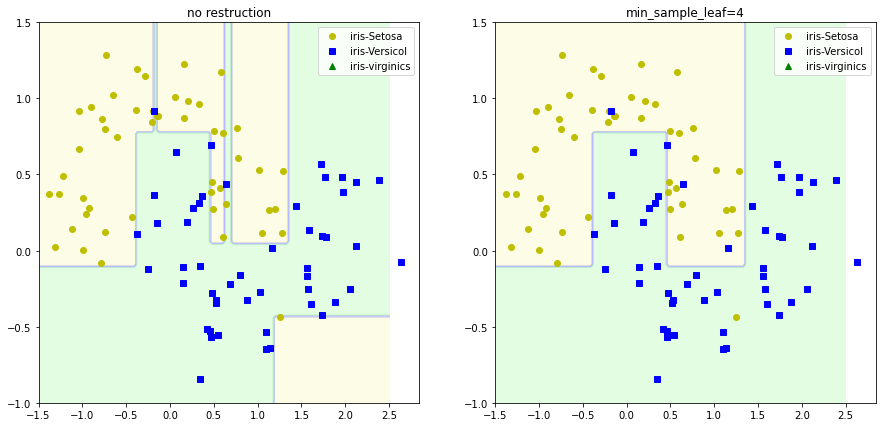

In [23]:
from sklearn.datasets import  make_moons
X,y = make_moons(n_samples=100,noise=0.25,random_state=53)
tree_clf_1 = DecisionTreeClassifier(random_state=42)
tree_clf_2 = DecisionTreeClassifier(random_state=42,min_samples_leaf=4)
tree_clf_1.fit(X,y)
tree_clf_2.fit(X,y)


plt.figure(figsize=(15,7))
plt.subplot(121)
plt.title('no restruction')
plot_decision_boundary(tree_clf_1,X,y,axes=[-1.5,2.5,-1,1.5])
plt.subplot(122)
plt.title('min_sample_leaf=4')
plot_decision_boundary(tree_clf_2,X,y,axes=[-1.5,2.5,-1,1.5])
plt.show()

In [24]:
np.random.seed(6)

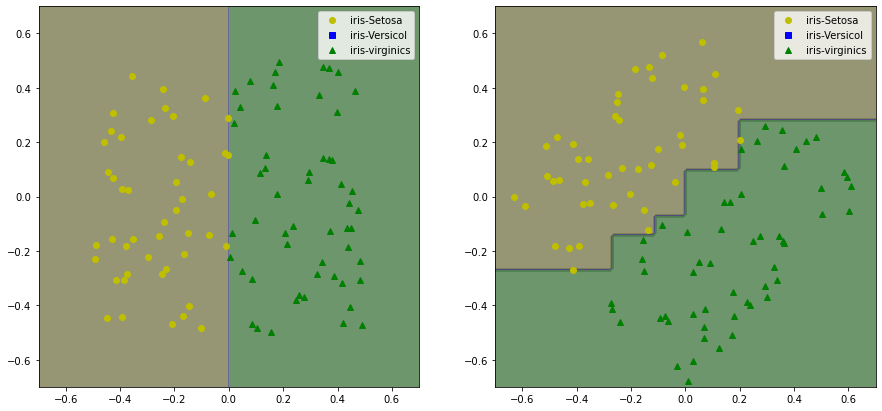

In [30]:
Xs = np.random.rand(100,2)-0.5
ys = (Xs[:,0]>0).astype(np.float32)*2
angle = np.pi/4
#矩阵旋转
rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs,ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr,ys)

plt.figure(figsize=(15,7))
plt.subplot(121)
plot_decision_boundary(tree_clf_s,Xs,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)

plt.subplot(122)
plot_decision_boundary(tree_clf_sr,Xsr,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)

plt.show()

In [31]:
np.random.seed(42)

In [34]:
from sklearn.tree import DecisionTreeRegressor
m =200
X = np.random.rand(m,1)
y = 4*(X-0.5)**2 +np.random.randn(m,1)/10

In [35]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [37]:
export_graphviz(
    tree_reg,
    out_file=('regression_tree.dot'),
    feature_names = ["x1"],
    rounded = True,
    filled = True
)

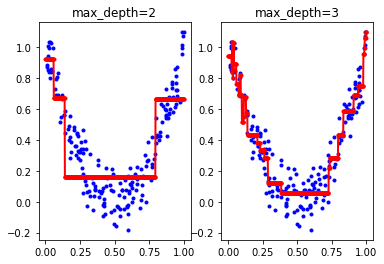

In [47]:
tree_reg_1 = DecisionTreeRegressor(random_state=42,max_depth=2)
tree_reg_2 = DecisionTreeRegressor(random_state=42,max_depth=5)

tree_reg_1.fit(X,y)
tree_reg_2.fit(X,y)

def plot_regression_predict(tree_reg,X,y,axes=[0,1,-0.2,1]):
    x1 = np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pre = tree_reg.predict(x1)
    plt.plot(X,y,'b.')
    plt.plot(x1,y_pre,"r.-",linewidth=2)

plt.subplot(121)
plt.title("max_depth=2")
plot_regression_predict(tree_reg_1,X,y,axes=[0,1,-0.2,1])
plt.subplot(122)
plt.title("max_depth=3")
plot_regression_predict(tree_reg_2,X,y,axes=[0,1,-0.2,1])
plt.show()